# Planar maps

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Define the map

In [4]:
A = np.array([
    [0, 1],
    [-1, 0]
])

In [5]:
A

array([[ 0,  1],
       [-1,  0]])

In [6]:
def planar_map(x_n, mat=A):
    return A @ x_n

Plot the phase space

In [7]:
np.linalg.eigvals(A)

array([0.+1.j, 0.-1.j])

In [8]:
eigvals, eigvec = np.linalg.eig(A)

In [9]:
eigvals

array([0.+1.j, 0.-1.j])

### Trajectories

In [22]:
ics = list()
ics.append(np.array([0, 1]))
ics.append(np.array([0.5, 0.5]))

In [25]:
number_its = 10
trajs = list()

for ic in ics:
    temp_traj = list()
    temp_traj.append(ic)
    prev_it = ic
    for _ in range(number_its):
        temp_traj.append(planar_map(prev_it))
        prev_it = temp_traj[-1]
        
        # break to stop explosions
        if np.linalg.norm(temp_traj[-1]) > 100:
            break
            
        # break to stop explosions
        if np.linalg.norm(temp_traj[-1]) < 1e-5:
            break
    
    trajs.append(temp_traj)

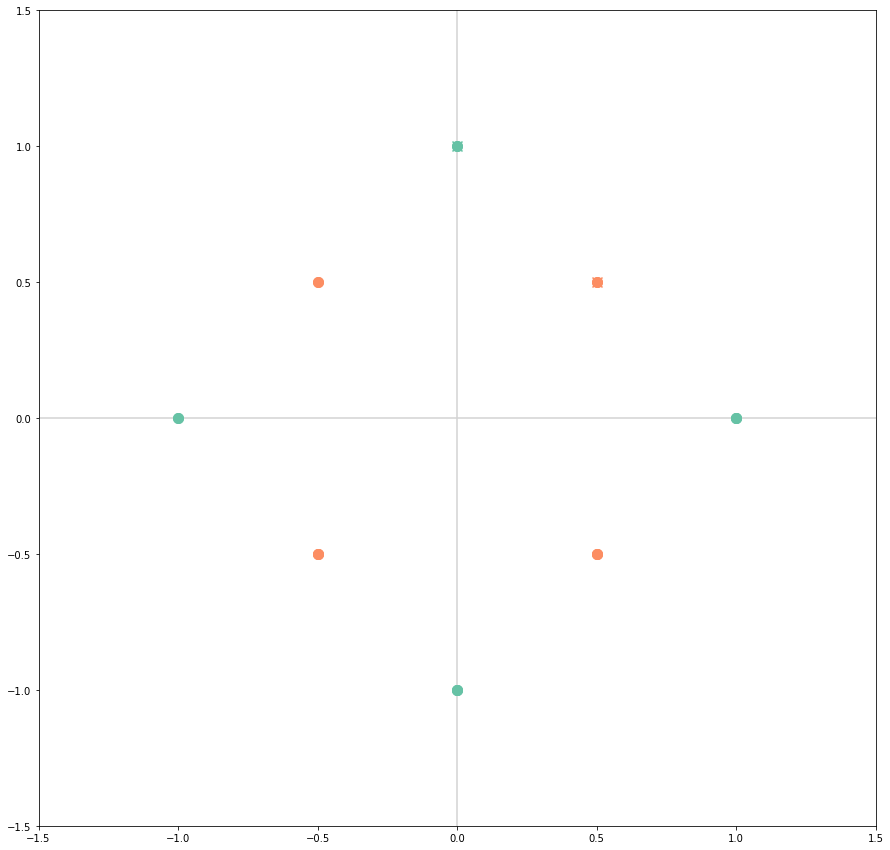

In [26]:
fig, ax = plt.subplots(figsize=(15, 15))
# plot axis
ax.hlines(0, -10, 10, color='lightgrey')
ax.vlines(0, -10, 10, color='lightgrey')

# plot eigan directions
# ax.plot(v1[:, 0], v1[:, 1], color='black', zorder=1)
# ax.plot(v2[:, 0], v2[:, 1], color='black', zorder=1)

for i, t in enumerate(trajs):
    ax.scatter(*t[0], s=100, marker='x', color=plt.get_cmap('Set2')(i), zorder=2)
    for s in t[1:]:
        ax.scatter(*s, s=100, color=plt.get_cmap('Set2')(i), zorder=2)

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
plt.show()